In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve

In [2]:
train_df = pd.read_csv('data/raw/train.csv')

In [3]:
train_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train_df.drop('label', axis=1).values
y = train_df.label.values

In [5]:
clf = LogisticRegression(n_jobs=-1)

In [6]:
train_sizes, train_scores, test_scores = learning_curve(
    clf,
    X[:1000], y[:1000],
    train_sizes=[0.01, 0.1, 0.25, 0.50, 0.75, 1], cv=5,
    scoring='f1_micro'
)

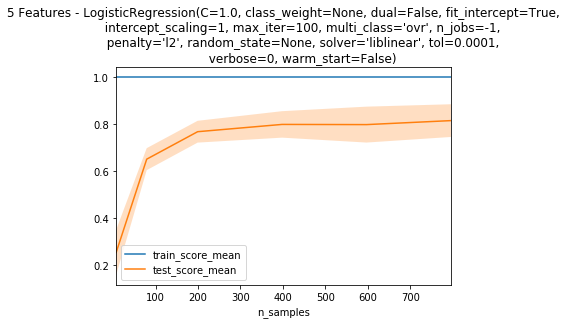

In [7]:
lc_df = pd.DataFrame(
    np.vstack([train_sizes,
               np.mean(train_scores, axis=1), np.std(train_scores, axis=1),
               np.mean(test_scores, axis=1), np.std(test_scores, axis=1)]).T,
    columns=['n_samples', 'train_score_mean', 'train_score_std', 'test_score_mean', 'test_score_std'],
)
title = '%d Features - %s' % (len(lc_df.columns), str(clf))
ax = lc_df.plot(x='n_samples', y=['train_score_mean', 'test_score_mean'], title=title);
plt.fill_between(
    lc_df.n_samples.values,
    lc_df.train_score_mean.values - 2 * lc_df.train_score_std.values,
    lc_df.train_score_mean.values + 2 * lc_df.train_score_std.values,
    alpha=0.25
);
plt.fill_between(
    lc_df.n_samples.values,
    lc_df.test_score_mean.values - 2 * lc_df.test_score_std.values,
    lc_df.test_score_mean.values + 2 * lc_df.test_score_std.values,
    alpha=0.25
);